# **📈 Parte 1: EDA (Exploratory Data Analysis)**

**1.1 Instalación pandasql**

**1.2 Cargamos el csv y comenzamos a explorar**

**1.3 Reconocemos Tipos de datos, duplicados y NaNs**

**1.4 Imputación de valores faltantes**

**1.5 Ajustamos tipos de datos**

**1.6 Calculos generados**


**1.1 Instalación pandasql**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Primero, instalamos la librería externa `pandasql` con el gestor de paquetes `pip`

In [ ]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=ee087bd6571fe4a448319961f90a0b053ae738ed2464dd184088f651dbeafa71
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


Luego importamos la librería para realizar consultas SQL `pandasql`

In [ ]:
import pandasql as psql

**1.2 Cargamos el csv y comenzamos a explorar**

Generamos el `dataframe` leyendo el `csv` de Titanic

Nota: El `csv` es descargado de Kaggle, página donde encontraremos muchos `csv` con data para analizar (https://www.kaggle.com/datasets/rahulsah06/titanic).

In [ ]:
df = pd.read_csv('/content/titanic.csv')


Es importante visualizar algunos registros de nuestro df para conocerlo un poco, visualizamos:
- Primeras 5 filas: `head(5)`
- 5 filas aleatorias: `sample(5)`
- Ultimas 5 filas: `tail(5)`


In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S


In [ ]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Visualizamos la cantidad de `filas` y `columnas` de nuestro `df`: Utilizamos `shape`

Nota: Leve pero importante diferencia, se utiliza sin `()` ya que *no es un método* sino que es una *propiedad/característica* de nuestro df.

In [ ]:
df.shape

(891, 12)

Como vemos, tenemos `891` filas y 12 `columnas`.

En ciencia de datos, llamaremos `samples` a las filas (registros) y `features` a las columnas (atributos de los registros)

**1.3 Reconocemos Tipos de datos, duplicados y NaNs**

Comencemos con el EDA (Análisis exploratorio).
Ahora analicemos info general de nuestro `df`, como:
- Tipos de datos: `info()`
- Duplicados: `duplicated()`
- `NaNs` (recordemos que significa Not a Number, indica ausencia de valor): `isna()`


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Recordemos que los `object` con como los string para nosotros y los asociaremos con un tipo de dato `categórico` (pudiendo ser ordinal o nominal).
Por otro lado, a los tipos de datos `int64` y `float64` los asociaremos a tipos de variables `numérica` (pudiendo ser discreto o continuo)

Entonces tenemos:
- Datos categóricos: `Pclass`,`Sex`,`Ticket`,
- Datos numéricos: El resto

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**1.4 Imputación de valores faltantes**

¿Qué tratamiento le damos a los valores faltantes?
Eliminar el registro es la última alternativa, ya que el proceso de obtención de datos es costoso y por lo cual las empresas invierten para obtenerlos.
Se suelen reemplazar por alguna medida de Tendencia Central:
- Media
- Mediana
- Moda

En el curso no ahondaremos en temas estadísticos, a fines de tratarlos aceptaremos reemplazarlos por la Mediana y ayudándonos con el método `fillna()`



In [ ]:
age_mediana = df['Age'].median()
df['Age'].fillna(age_mediana, inplace=True)

En el caso de `Cabin` y `Embarked`, lo reemplazamos por `Unknown` ya que no es un dato numérico que pueda reemplazarse por una medida de tendencia central.

In [ ]:
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna('Unknown', inplace=True)

Volvemos a validar `NaNs`

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**1.5 Ajustamos tipos de datos**

Si miramos con detenimiento el tipo de dato, `Age` figura como `float64` y por lógica podríamos convertirlo a `int64` dado que no manejamos edades con `coma`

In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


**1.6 Calculos generados**




Para agregar columnas o `features` con nuevos valores a partir de funciones definidas con todo lo que vimos anteriormente se realizan los siguientes pasos:
- 1) Se define la función
- 2) Se agrega una nueva columna al df y se utiliza el método `apply()`

In [ ]:
def agrupar_edad(edad):
  try:
    if edad < 0:
        return 'Invalid'
    elif edad < 20:
        return '0-20'
    elif edad < 40:
        return '20-40'
    elif edad < 60:
        return '40-60'
    elif edad < 80:
        return '60-80'
    elif edad <= 100:
        return '80-100'
    else:
        return '100+'
  except TypeError:
      print('Dato no válido')
  except Exception as e:
    print(f'Excepción no capturada')

In [ ]:
df['age_group'] = df['Age'].apply(agrupar_edad)

Ahora realizamos también agrupaciones por grupo de tarifas o `Fare`

In [ ]:
def agrupar_tarifa(fare):
  try:
    if 0<fare < 150.0:
        return 'Baja'
    elif 150.0 <= fare < 350.0:
        return 'Media'
    elif 350.0 <= fare:
        return 'Alta'
  except TypeError:
      print('Dato no válido')
  except Exception as e:
    print(f'Excepción no capturada')

In [ ]:
df['fare_group'] = df['Fare'].apply(agrupar_tarifa)

Vemos como quedó nuestro `df`

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,20-40,Baja
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,20-40,Baja
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,20-40,Baja
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,20-40,Baja
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,20-40,Baja


# **📈 Parte 2: Hipótesis. Visualizaciones. Estadísticas**

**2.1 Hipótesis iniciales**

**2.2 Diagrama de barras**

**2.3 Diagrama de torta**

**2.4 Histograma de Tarifas**

**2.5 Diagrama Caja-Bigote**

**2.6 Diagrama de Violin**

**2.7 Pair Plot**

**2.1 Hipótesis iniciales**

Antes de analiar, podemos plantearnos algunas hipótesis iniciales que luego confirmaremos con el análsisi descriptivo de los datos:

1. La tripulación era 50% hombre y 50% mujeres
2. La mayoría de las personas tienen entre 40 y 60 años
3. Las tarifas mas comunesson las económicas.

Los diagramas que veremos son para sacar algunas conclusiones son:
- Diagrama de Barras
- Diagrama de torta
- Histograma
- Diagrama de Caja-Bigote
- Diagrama Violín
- PairPlot

**2.2 Diagrama de barras**


Veamos la distribución de cantidades de la tripulación por sexo. Para eso utilizams el método `countplot()` de la librería `seaborn`

<ipython-input-27-b5ac53556dea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x = 'Sex', palette = 'muted')


<Axes: xlabel='Sex', ylabel='count'>

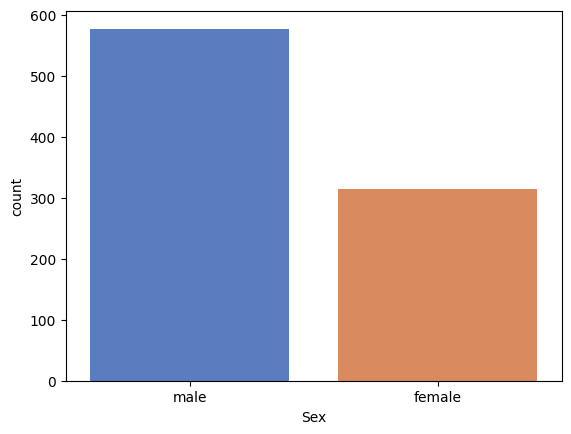

In [ ]:
sns.countplot(data= df, x = 'Sex', palette = 'muted')

Nota: Esto nos lleva a desestimar la `Hipótesis 1`

A tener en cuenta:

- Gráfico de Barras: Representación gráfica de datos `categoricos` o `numéricos` (discretos)
- Histograma: Representación gráfica de datos `numéricos` (continuos) donde vemos la distribución de frecuencias del conjunto.

Gráfico de barras de las edades por grupo:

<ipython-input-52-1d27aedb0aef>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


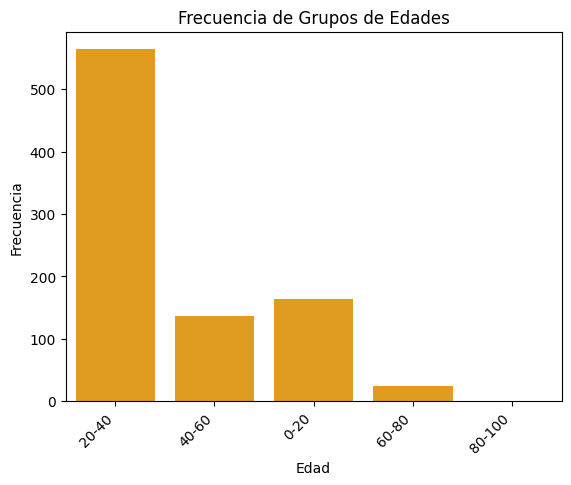

In [ ]:
ax = sns.countplot(x='age_group', data=df, color='orange')

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Añadir título y etiquetas a los ejes
plt.title('Frecuencia de Grupos de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Nota: Esto nos lleva a desestimar la `Hipótesis 2`

Gráfico de barras de las tarifas por grupo:

<ipython-input-51-d2f0f97b3d88>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


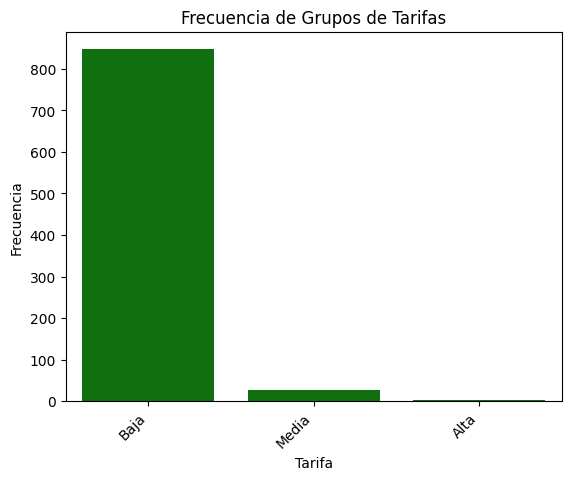

In [ ]:
ax = sns.countplot(x='fare_group', data=df, color='green')

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Añadir título y etiquetas a los ejes
plt.title('Frecuencia de Grupos de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Nota: Esto nos lleva a confirmar la `Hipótesis 3`

**2.3 Diagrama de torta**

Para este caso nos ayudamos con el método `pie()` de la lirbería `matplotlib`

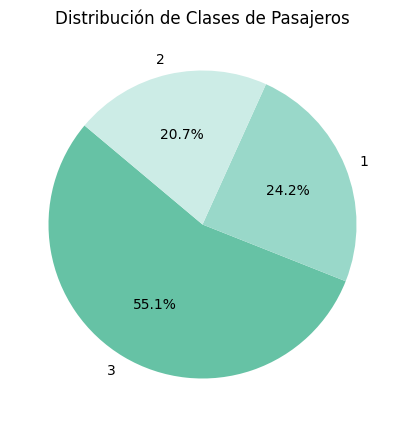

In [ ]:
cantidades_por_clase = df['Pclass'].value_counts()

# Plotting the pie chart for passenger class distribution
plt.figure(figsize=(8, 5))
plt.pie(cantidades_por_clase, labels=cantidades_por_clase.index, colors=['#66c2a5', '#99d8c9', '#ccece6'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Clases de Pasajeros')
plt.show()

**2.4 Histograma de Tarifas**

Recordemos dato numérico continuo

<ipython-input-59-314e9948a050>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


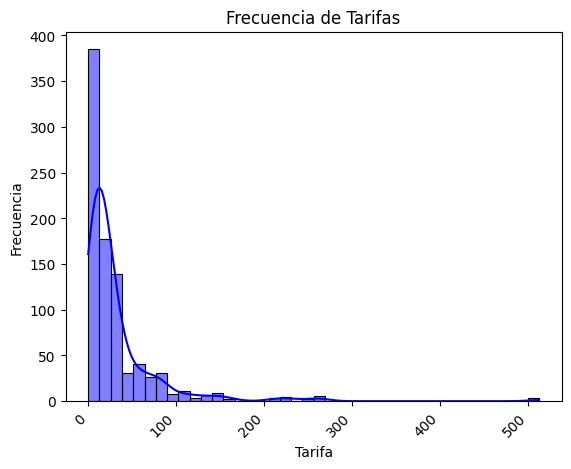

In [ ]:
ax = sns.histplot(x='Fare', data=df, color='blue', bins = 40, kde=True)

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Añadir título y etiquetas a los ejes
plt.title('Frecuencia de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

**2.5 Diagrama Caja-Bigote**
Veamos ahora un diagrama de Caja-Bigote utilizado para variables numéricas continuas también. Como sólo tenemos `float64` la `Fare` utilizaremos ese dato

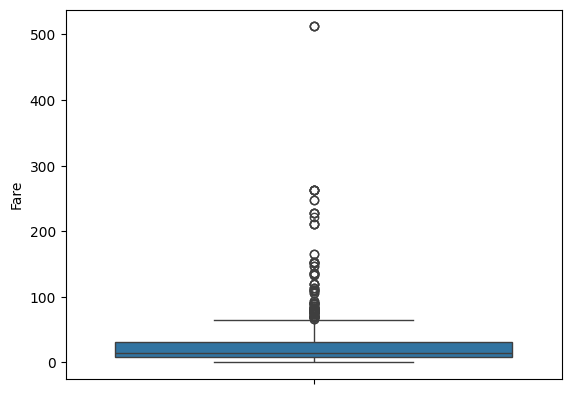

In [ ]:
ax = sns.boxplot(data = df, y='Fare')

Este gráfico lo podemos complementar con el método `describe()` que nos devuelve los principales valores estadísticos de esa feature.

In [ ]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**2.6 Diagrama de Violin**

Este diagrama además nos da una idea de la distribución de frecuencias de esa feature.

<ipython-input-65-53dca3e76bfa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data = df, y='Fare', palette = 'Set2')


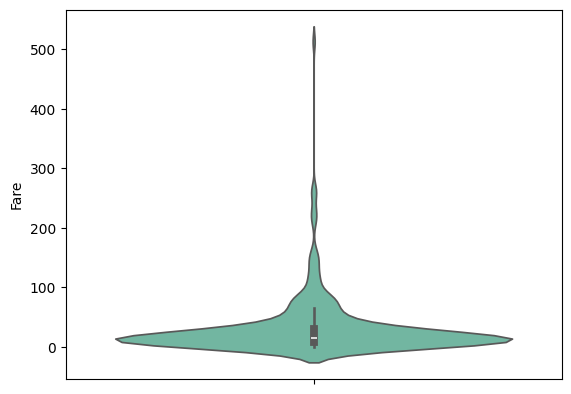

In [ ]:
ax = sns.violinplot(data = df, y='Fare', palette = 'Set2')

Diagrama Violín por distribución de edad según si sobrevivieron o no

<ipython-input-69-e1d9f9c3eadc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, inner='quartile', palette='Greens')


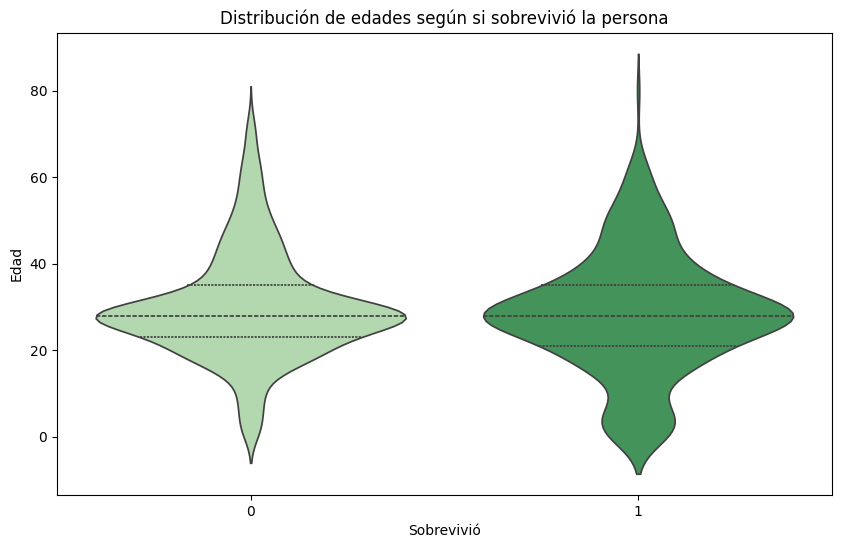

In [ ]:
# Age vs survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, inner='quartile', palette='Greens')
plt.title('Distribución de edades según si sobrevivió la persona')
plt.xlabel('Sobrevivió')
plt.ylabel('Edad')
plt.show()

**2.7 Pair Plot**

Permite visualizar las relaciones entre múltiples variables en el dataset, destacando las relaciones por `pares` y `distribuciones`

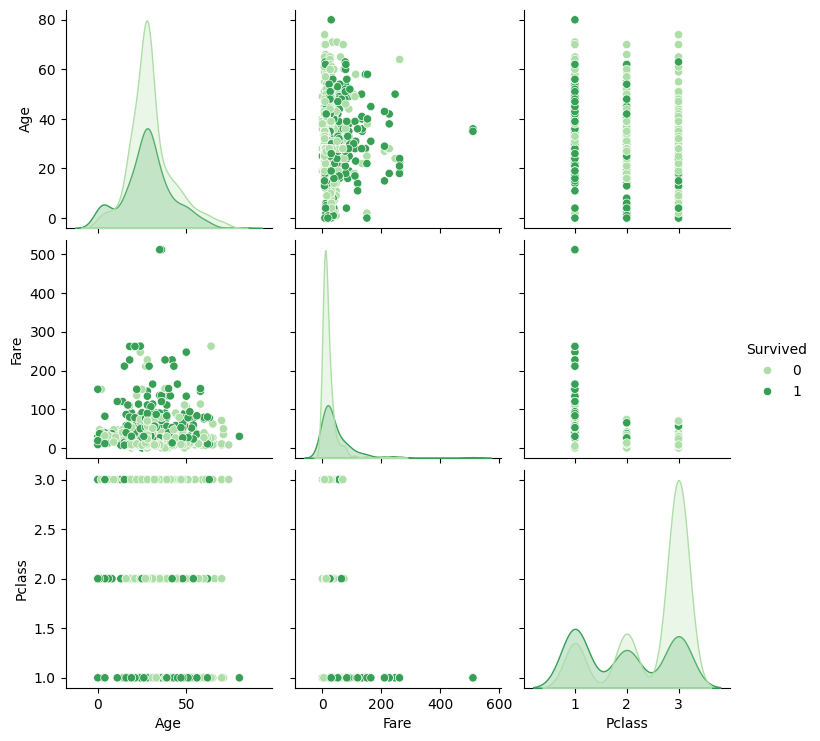

In [ ]:

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='Greens')
plt.show()

# **📈 Parte 3: Querys al Dataset**

Para realizar consultas SQL al dataset nos ayudamos con la librería `pandasql` que instalamos al principio.

In [ ]:
# Definir una consulta SQL
query = """
SELECT Age, Fare, Survived, Pclass
FROM df
WHERE Age > 25
ORDER BY Age
"""

# Ejecutar la consulta SQL usando pandasql
result = psql.sqldf(query,)

# Mostrar el resultado
print("Datos de personas mayores a 25 de edad \n",result)

Datos de personas mayores a 25 de edad 
      Age     Fare  Survived  Pclass
0     26   7.9250         1       3
1     26   8.6625         0       3
2     26  14.4542         0       3
3     26  20.5750         0       3
4     26   7.7750         0       3
..   ...      ...       ...     ...
585   70  71.0000         0       1
586   71  34.6542         0       1
587   71  49.5042         0       1
588   74   7.7750         0       3
589   80  30.0000         1       1

[590 rows x 4 columns]


In [ ]:
# Definir una consulta SQL
query2 = """
SELECT Age, Fare, Survived, Pclass
FROM df
WHERE Survived = 1
"""

# Ejecutar la consulta SQL usando pandasql
result2 = psql.sqldf(query2,)

# Mostrar el resultado
print("Datos de sobrevivientes \n", result2)

Datos de sobrevivientes 
      Age     Fare  Survived  Pclass
0     38  71.2833         1       1
1     26   7.9250         1       3
2     35  53.1000         1       1
3     27  11.1333         1       3
4     14  30.0708         1       2
..   ...      ...       ...     ...
337   15   7.2250         1       3
338   56  83.1583         1       1
339   25  26.0000         1       2
340   19  30.0000         1       1
341   26  30.0000         1       1

[342 rows x 4 columns]


In [ ]:
# Definir una consulta SQL
query3 = """
SELECT sum(Fare)
FROM df
"""

# Ejecutar la consulta SQL usando pandasql
result3 = psql.sqldf(query3,)

# Mostrar el resultado
print("Suma total de todas las tarifas pagadas \n",result3)

Suma total de todas las tarifas pagadas 
     sum(Fare)
0  28693.9493
